In [16]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [17]:
data_survey = pd.read_csv('D:\Dataset\data_survey.csv')
data_survey

,Unnamed: 0,Timestamp,Age,Gender,Relationship,Occupation,Affiliation,SocialMedia,Platforms,TimeSpent,...,Restlessness,EasilyDistracted,Worries,Concentration,Comparison,ComparisonFeel,Validation,Depression,InterestFluctuation,SleepIssues
0,0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,2,5,2,5,2,3,2,5,4,5
1,1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,...,2,4,5,4,5,1,1,5,4,5
2,2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,...,1,2,5,4,3,3,1,4,2,5
3,3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,...,1,3,5,3,5,1,2,4,3,2
4,4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,...,3,4,3,4,4,2,4,3,4,4
477,477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,...,2,3,4,4,4,2,4,4,4,1
478,478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,...,4,3,2,3,3,3,4,2,2,2
479,479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,...,2,3,3,2,2,3,4,4,5,4


In [19]:
data_survey.drop(columns = 'Unnamed: 0', inplace = True, axis = 0)

In [20]:
data_survey.head()

,Timestamp,Age,Gender,Relationship,Occupation,Affiliation,SocialMedia,Platforms,TimeSpent,NoPurposeUse,...,Restlessness,EasilyDistracted,Worries,Concentration,Comparison,ComparisonFeel,Validation,Depression,InterestFluctuation,SleepIssues
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [21]:
data_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Gender               481 non-null    object 
 3   Relationship         481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliation          451 non-null    object 
 6   SocialMedia          481 non-null    object 
 7   Platforms            481 non-null    object 
 8   TimeSpent            481 non-null    object 
 9   NoPurposeUse         481 non-null    int64  
 10  Distraction          481 non-null    int64  
 11  Restlessness         481 non-null    int64  
 12  EasilyDistracted     481 non-null    int64  
 13  Worries              481 non-null    int64  
 14  Concentration        481 non-null    int64  
 15  Comparison           481 non-null    int

In [22]:
data_survey.describe()

,Age,NoPurposeUse,Distraction,Restlessness,EasilyDistracted,Worries,Concentration,Comparison,ComparisonFeel,Validation,Depression,InterestFluctuation,SleepIssues
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
data_survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Relationship', 'Occupation',
       'Affiliation', 'SocialMedia', 'Platforms', 'TimeSpent', 'NoPurposeUse',
       'Distraction', 'Restlessness', 'EasilyDistracted', 'Worries',
       'Concentration', 'Comparison', 'ComparisonFeel', 'Validation',
       'Depression', 'InterestFluctuation', 'SleepIssues'],
      dtype='object')

In [24]:
numeric_columns = data_survey.select_dtypes(include=['float64', 'int64']).columns

In [25]:
numeric_columns

Index(['Age', 'NoPurposeUse', 'Distraction', 'Restlessness',
       'EasilyDistracted', 'Worries', 'Concentration', 'Comparison',
       'ComparisonFeel', 'Validation', 'Depression', 'InterestFluctuation',
       'SleepIssues'],
      dtype='object')

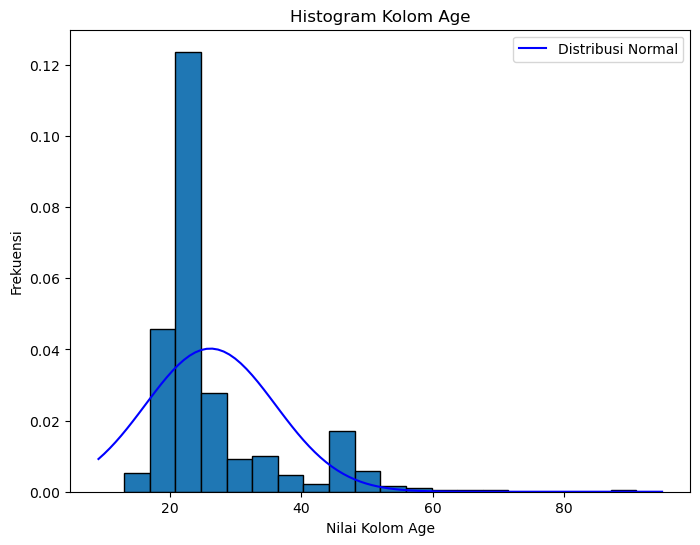

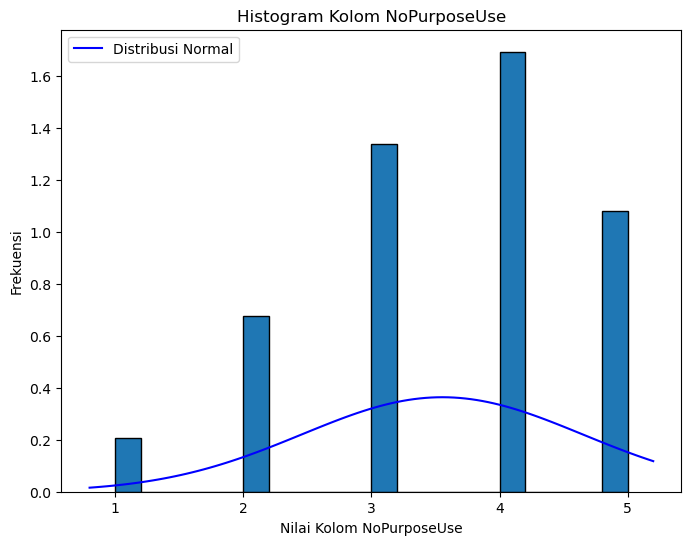

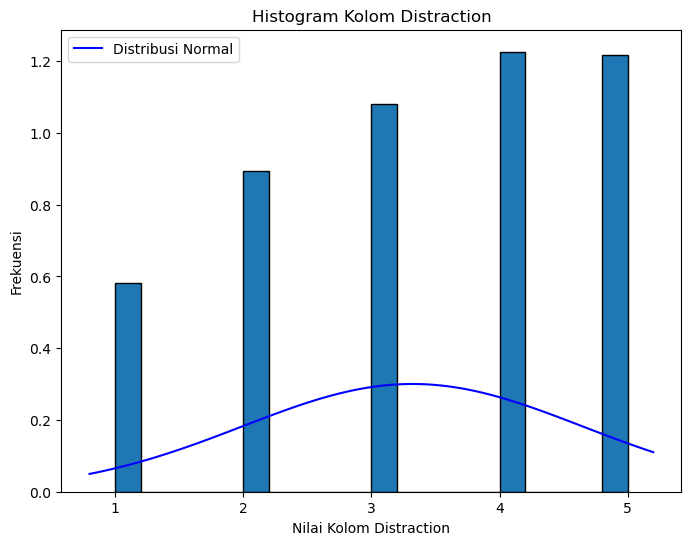

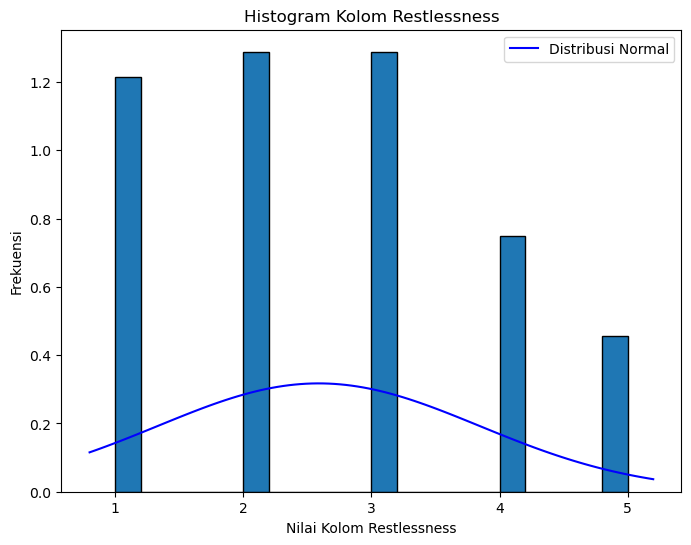

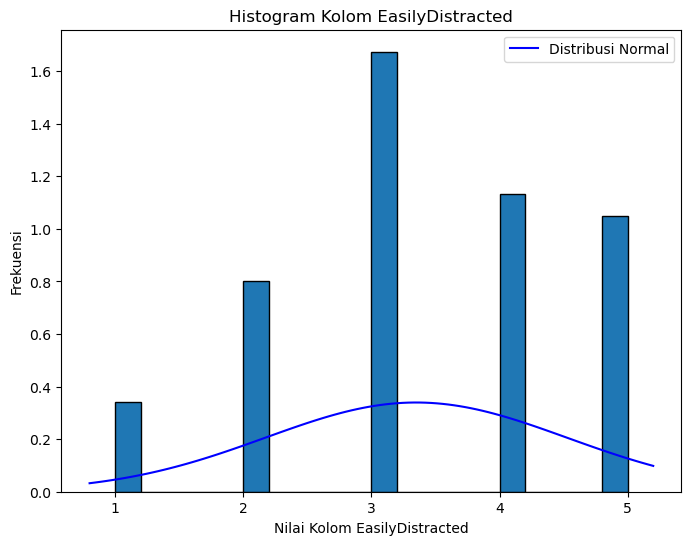

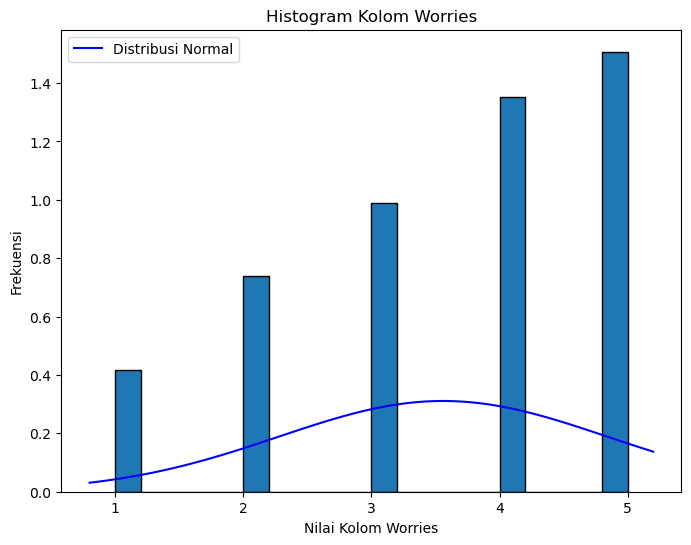

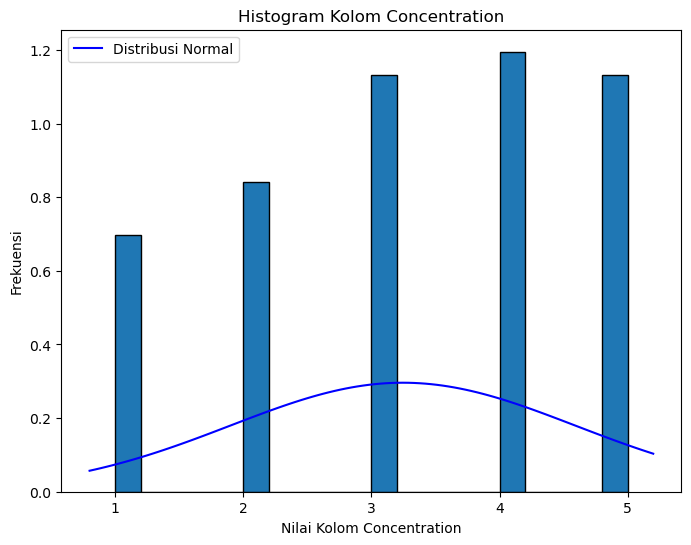

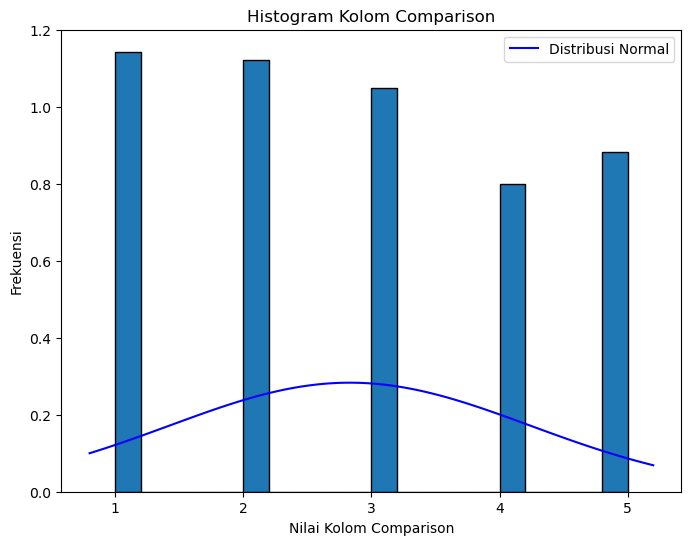

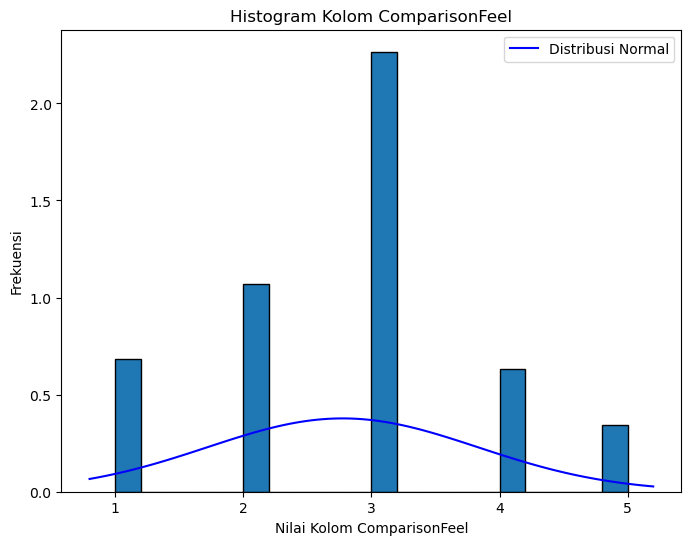

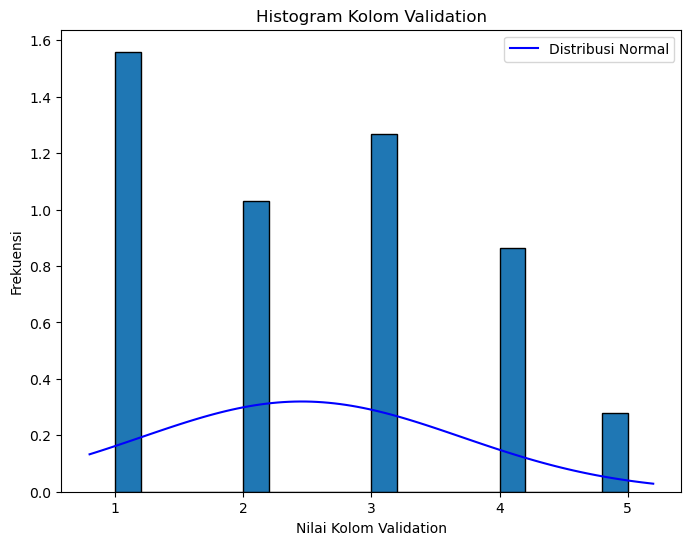

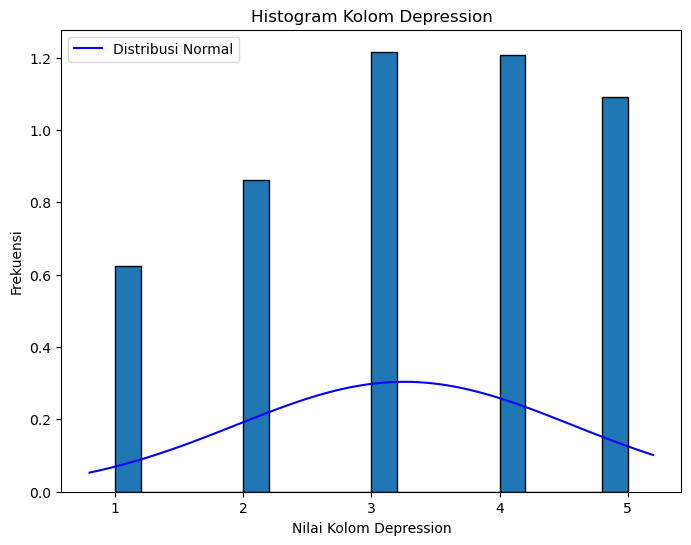

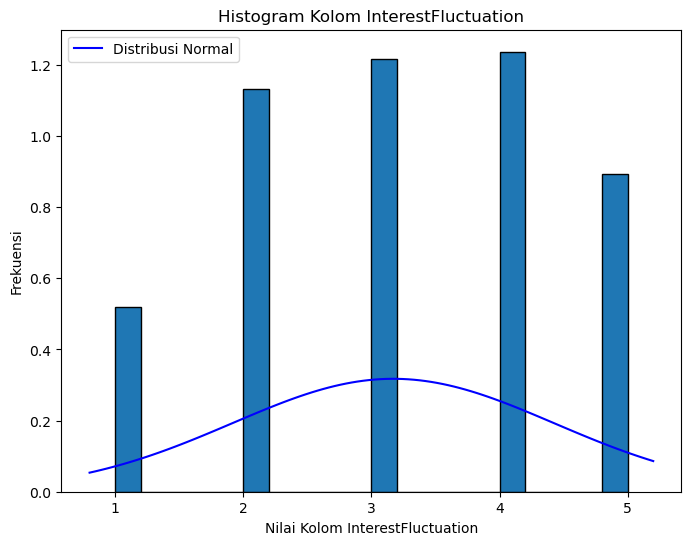

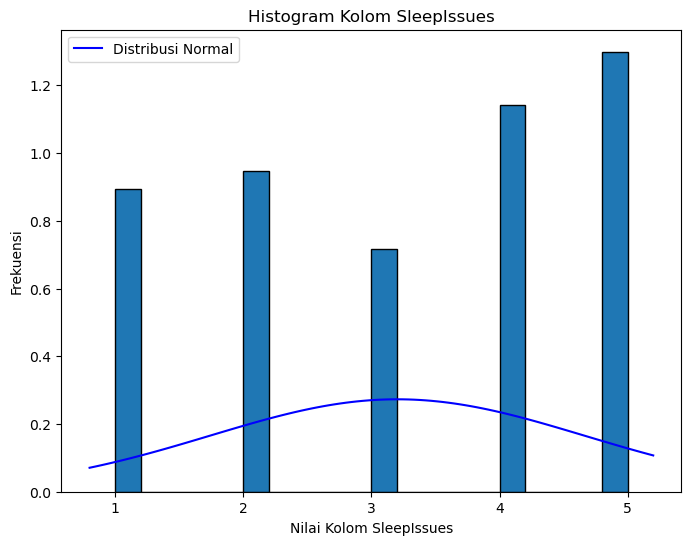

In [26]:
# Buat histogram untuk setiap kolom
for kolom in numeric_columns:
    plt.figure(figsize=(8, 6))  # Atur ukuran gambar
    plt.hist(data_survey[kolom], bins=20, edgecolor='black', density=True)  # Buat histogram
    
    mean = data_survey[kolom].mean()
    median = data_survey[kolom].median()
    mode = data_survey[kolom].mode()[0]
    std = data_survey[kolom].std()
    
    # Buat garis distribusi normal
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)  # Distribusi normal dengan mean dan std
    plt.plot(x, y, 'b-', label='Distribusi Normal')
    
    plt.title(f"Histogram Kolom {kolom}")
    plt.xlabel(f"Nilai Kolom {kolom}")
    plt.ylabel("Frekuensi")
    plt.legend()
    plt.show()  # Tampilkan histogram

In [27]:
def describe_manual(data, columns):
    results = []
    for col in columns:
    # Mean
        mean = data[col].mean()
    # Modus
        mode = data[col].mode()[0]
    # Median
        median = data[col].median()
    # Varians
        variance = data[col].var()
    # Standar Deviasi
        std_dev = data[col].std()
    # Kuartil
        q1 = data[col].quantile(0.25)
        q2 = data[col].quantile(0.50)
        q3 = data[col].quantile(0.75)
    # Range
        range_val = data[col].max() - data[col].min()

        results.append({
            'Kolom': col,
            'Mean': mean,
            'Modus': mode,
            'Median': median,
            'Varians': variance,
            'Standar Deviasi': std_dev,
            'Kuartil 1': q1,
            'Kuartil 2': q2,
            'Kuartil 3': q3,
            'Range': range_val
        })

    return pd.DataFrame(results)


# Menghitung statistik deskriptif untuk kolom 'Umur' dan 'Pendapatan'
stats = describe_manual(data_survey, numeric_columns)
stats


,Kolom,Mean,Modus,Median,Varians,Standar Deviasi,Kuartil 1,Kuartil 2,Kuartil 3,Range
0,Age,26.136590,21.0,22.0,98.309408,9.915110,21.0,22.0,26.0,78.0
1,NoPurposeUse,3.553015,4.0,4.0,1.201871,1.096299,3.0,4.0,4.0,4.0
2,Distraction,3.320166,4.0,3.0,1.763947,1.328137,2.0,3.0,4.0,4.0
3,Restlessness,2.588358,2.0,2.0,1.580198,1.257059,2.0,2.0,3.0,4.0
4,EasilyDistracted,3.349272,3.0,3.0,1.381921,1.175552,3.0,3.0,4.0,4.0
5,Worries,3.559252,5.0,4.0,1.647003,1.283356,3.0,4.0,5.0,4.0
6,Concentration,3.245322,4.0,3.0,1.814692,1.347105,2.0,3.0,4.0,4.0
7,Comparison,2.831601,1.0,3.0,1.981999,1.407835,2.0,3.0,4.0,4.0
8,ComparisonFeel,2.775468,3.0,3.0,1.116147,1.056479,2.0,3.0,3.0,4.0
9,Validation,2.455301,1.0,2.0,1.556852,1.247739,1.0,2.0,3.0,4.0


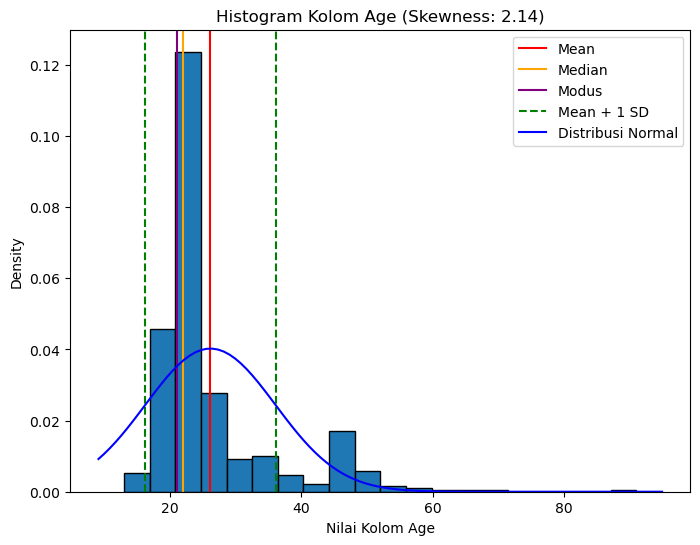

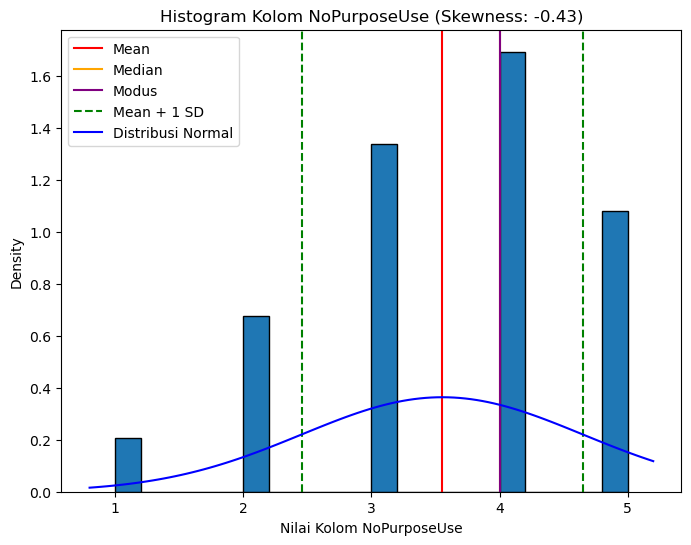

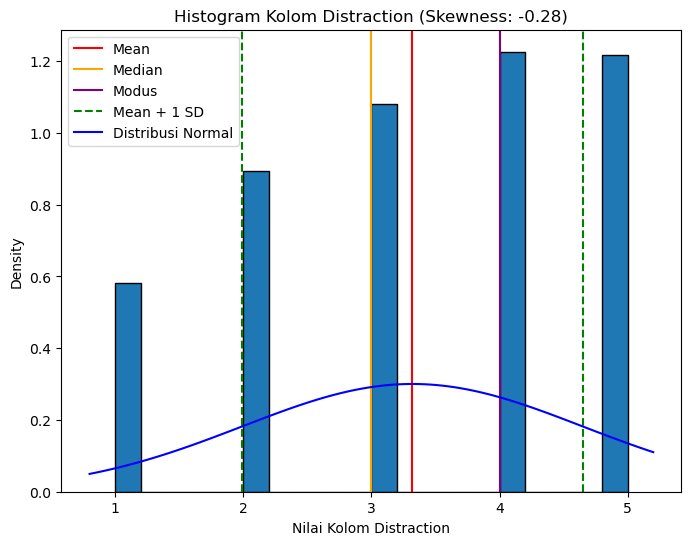

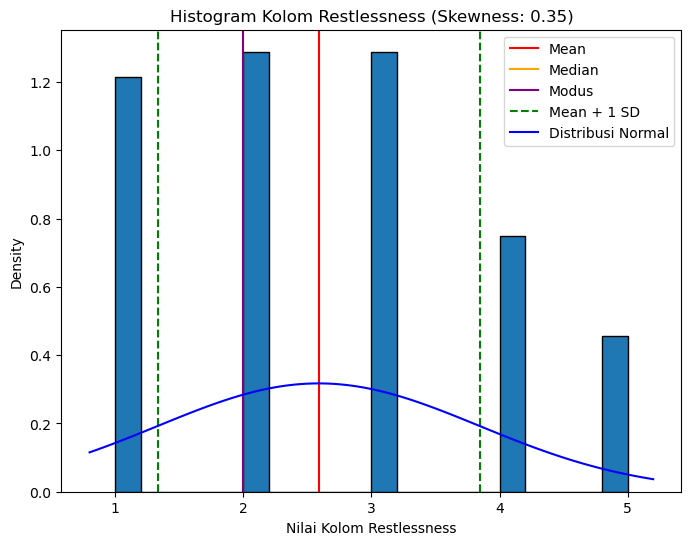

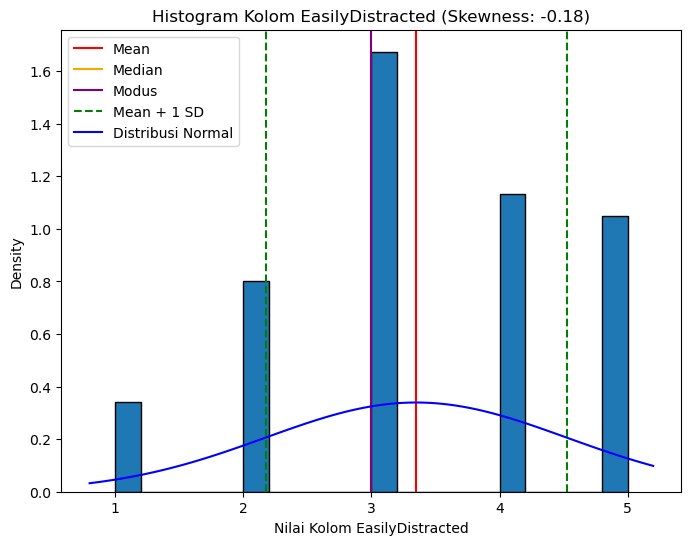

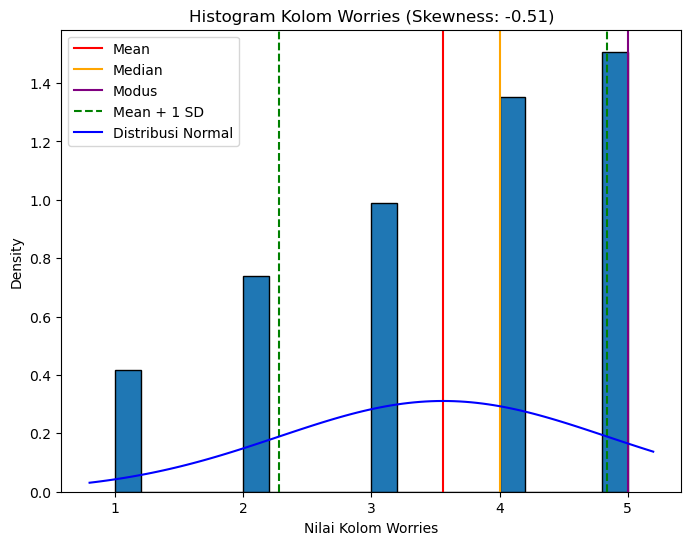

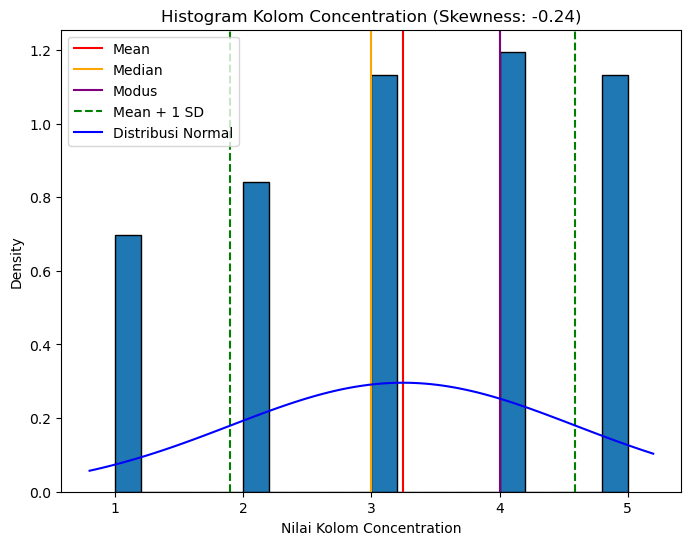

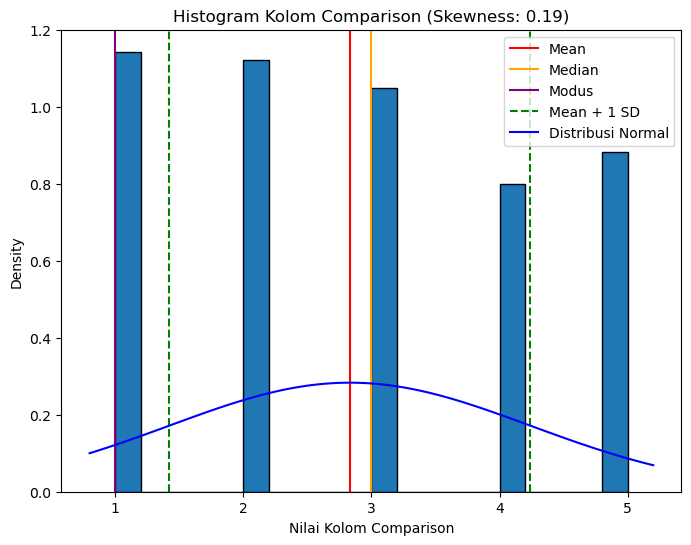

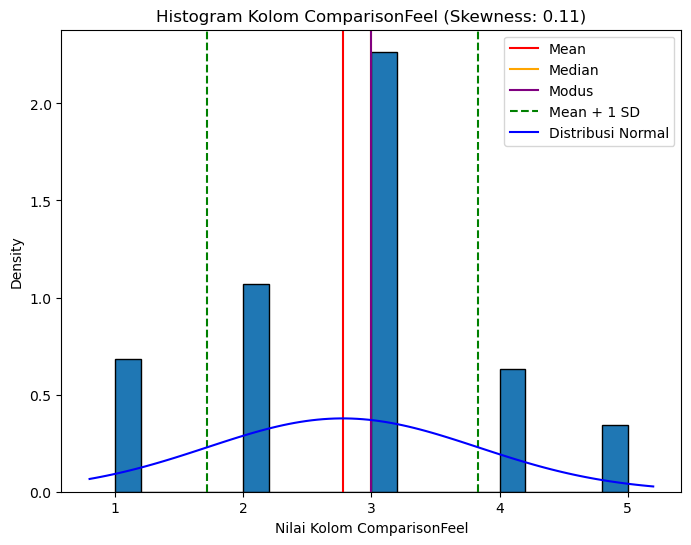

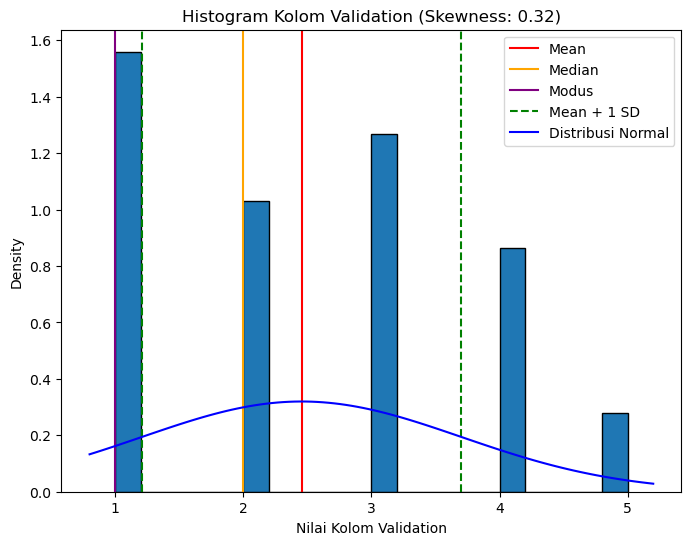

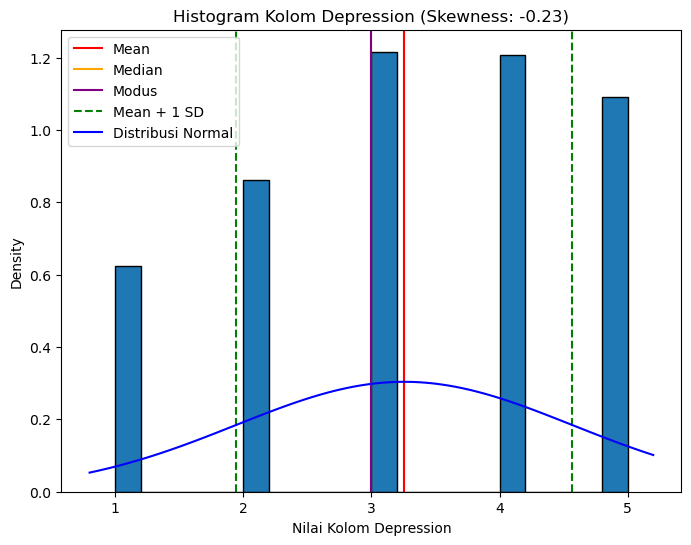

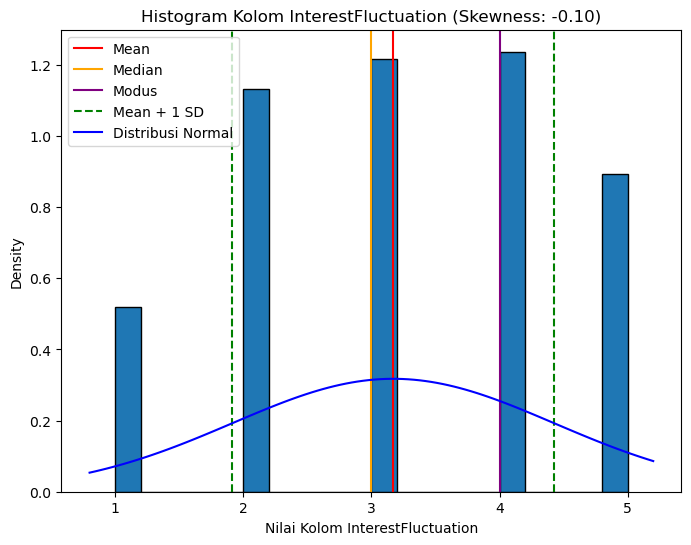

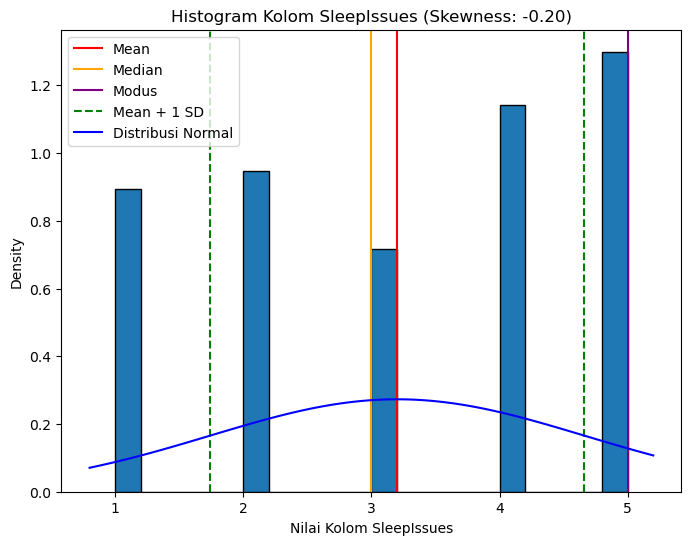

In [28]:
# Buat histogram untuk setiap kolom
for kolom in numeric_columns:
    plt.figure(figsize=(8, 6))  # Atur ukuran gambar
    plt.hist(data_survey[kolom], bins=20, edgecolor='black', density=True)  # Buat histogram

    # Hitung skewness untuk menambahkan garis pembantu
    skewness = data_survey[kolom].skew()

    # Hitung mean, median, dan modus
    mean = data_survey[kolom].mean()
    median = data_survey[kolom].median()
    mode = data_survey[kolom].mode()[0]

    # Hitung standar deviasi
    std = data_survey[kolom].std()

    # Tambahkan garis vertikal untuk mean
    plt.axvline(mean, color='red', linestyle='-', label='Mean')

    # Tambahkan garis vertikal untuk median
    plt.axvline(median, color='orange', linestyle='-', label='Median')

    # Tambahkan garis vertikal untuk modus
    plt.axvline(mode, color='purple', linestyle='-', label='Modus')

    # Tambahkan garis vertikal untuk mean + 1 standar deviasi
    plt.axvline(mean + std, color='green', linestyle='--', label='Mean + 1 SD')

    # Tambahkan garis vertikal untuk mean - 1 standar deviasi
    plt.axvline(mean - std, color='green', linestyle='--')

    # Buat garis distribusi normal
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)  # Distribusi normal dengan mean dan std
    plt.plot(x, y, 'b-', label='Distribusi Normal')

    # Atur judul, label sumbu, dan legenda
    plt.title(f"Histogram Kolom {kolom} (Skewness: {skewness:.2f})")
    plt.xlabel(f"Nilai Kolom {kolom}")
    plt.ylabel("Density")
    plt.legend()
    plt.show()  # Tampilkan histogram


In [29]:
for i in range(len(numeric_columns)):
    print(f'{i+1}. {numeric_columns[i]}')

1. Age
2. NoPurposeUse
3. Distraction
4. Restlessness
5. EasilyDistracted
6. Worries
7. Concentration
8. Comparison
9. ComparisonFeel
10. Validation
11. Depression
12. InterestFluctuation
13. SleepIssues


1. Age

Jenis Distribusi: Skewed Kanan (Right-skewed)

Alasan: Nilai skewness 2.14 yang positif konsisten dengan bentuk histogram, yang menunjukkan ekor kanan yang lebih panjang. Mean (25.5) lebih besar dari median (22) dan modus (22), yang juga mengindikasikan skewness kanan.

2. NoPurposeUse

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.43 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.5) sedikit lebih kecil dari median (3.5) dan modus (4).

3. Distraction

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.28 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.4) sedikit lebih kecil dari median (3.5) dan modus (4).

4. Restlessness

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness positif.

Alasan: Nilai skewness 0.35 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kanan. Letak mean (2.8) sedikit lebih besar dari median (2.5) dan modus (2).

5. EasilyDistracted

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.18 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.3) sedikit lebih kecil dari median (3.5) dan modus (3).

6. Worries

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.51 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.7) sedikit lebih kecil dari median (4) dan modus (4).

7. Concentration

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.24 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.3) sedikit lebih kecil dari median (3.5) dan modus (4).

8. Comparison

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness positif.

Alasan: Nilai skewness 0.19 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kanan. Letak mean (3.1) lebih besar sedikit dari median (3) dan modus (3).

9. ComparisonFeel

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness positif.

Alasan: Nilai skewness 0.11 mendekati 0, menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kanan. Letak mean (3.1) lebih besar sedikit dari median (3) dan modus (3).

10. Validation

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness positif.

Alasan: Nilai skewness 0.32 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kanan. Letak mean (2.8) sedikit lebih besar dari median (2.5) dan modus (2).

11. Depression

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.23 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.3) sedikit lebih kecil dari median (3.5) dan modus (4).

12. InterestFluctuation

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.10 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.2) sedikit lebih kecil dari median (3.5) dan modus (4).

13. SleepIssues

Jenis Distribusi: Mungkin mendekati Uniform, atau diskrit dengan sedikit skewness negatif.

Alasan: Nilai skewness -0.20 mendekati 0, yang menunjukkan distribusi mendekati simetris. Namun, histogram menunjukkan sedikit penyimpangan dari uniform, dengan sedikit kecenderungan ke arah kiri. Letak mean (3.4) sedikit lebih kecil dari median (3.5) dan modus (4).